In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

* https://glowingpython.blogspot.com
* https://github.com/rougier/matplotlib-tutorial

![](../figure/xmind/matplotlib.png)
https://realpython.com/python-matplotlib-guide/

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import plotly # (*) To communicate with Plotly's server, sign in with credentials file
import chart_studio.plotly as py  # (*) Useful Python/Plotly tools
import plotly.tools as tls   # (*) Graph objects to piece together plots
from plotly.graph_objs import *

In [ ]:
?plt.plot

In [ ]:
countries = ["United Arab Emirates", "Central African Republic", "Bosnia and Herzegovina"]
population = [9770529, 4745185, 3301000]

_ = plt.xlabel("Countries")
_ = plt.bar(range(len(countries)), population)

_ = plt.title("Countries in the world by population (2019)")   
#_ = plt.xlabel("Countries")
_ = plt.ylabel("Population")   

_ = plt.xticks(range(len(countries)), countries, rotation='40')
_ = plt.yscale('log')

plt.show()

In [ ]:
plt.get_backend()

# 3D plot

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# Object oriented Programming

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Create an object of figure
fig = plt.figure()

# Create an object of axes
ax = Axes3D(fig)

_ = ax.plot_surface(X, Y, Z, rstride=1, cstride=1)


plt.style.use('ggplot')
plt.show()

# Multicolor line

> Python中的函数式编程是通过封装对象实现的。matplotlib中的函数式调用其实也是如此。matplotlib本质上还是构建对象来构建图像函数式编程将构建对象的过程封装在函数中，从而让我们觉得很方便。

In [ ]:
x = np.linspace(0,100,100)
y = x

_ = plt.plot(x[:50], y[:50], color = 'r')
_ = plt.plot(x[50:], y[50:], color = 'g')
plt.show()

In [ ]:
y = np.random.choice(10,10)
y 
for x1, x2, y1,y2 in zip(x, x[1:], y, y[1:]):
    print([x1, x2], [y1, y2] )

In [ ]:
x = range(10)
y = np.random.choice(10,10)
for x1, x2, y1,y2 in zip(x, x[1:], y, y[1:]):
    if y1 > y2:
        _ = plt.plot([x1, x2], [y1, y2], 'r')
    elif y1 < y2:
        _ = plt.plot([x1, x2], [y1, y2], 'g')
    else:
        _ = plt.plot([x1, x2], [y1, y2], 'b')

plt.show()

<span style="font-family:New York Times;font-size:1.2 em; color:green;">
Will module numpy replace module math? 

# pandas plot

In [ ]:
data = {'A': {'pos': 289794, 'neg': 515063},
        'B': {'pos': 174790, 'neg': 292551},
        'C': {'pos': 375574, 'neg': 586616},
        'D': {'pos': 14932, 'neg': 8661}}
df = pd.DataFrame(data)

In [ ]:
df[['A', 'B', 'C', 'D']].plot(kind='bar',
                              title="V comp",
                              figsize=(8, 6),
                              legend=True,
                              fontsize=12)

In [ ]:
data = {'A': {'pos': 289794, 'neg': 515063},
        'B': {'pos': 174790, 'neg': 292551},
        'C': {'pos': 375574, 'neg': 586616},
        'D': {'pos': 14932, 'neg': 8661}}
df = pd.DataFrame(data)
df = df.T
df ['sum'] = df.sum(axis=1)
df.sort_values('sum', ascending=False)[['neg','pos']].plot.bar() 

## [Writing mathmatical expression](https://matplotlib.org/users/mathtext.html)

$$2(e^t-1)\displaystyle\sum_{n = 2}^{\infty} \frac{(-1)^{n+1}}{n(n^2-1)}e^{-n^2t}\sin nx$$

* https://glowingpython.blogspot.com/2011/04/how-to-plot-function-using-matplotlib.html

In [ ]:
x = np.linspace(-15,15,100) # 100 linearly spaced numbers
y = np.sin(x)/x # computing the values of sin(x)/x

# compose plot
_ = plt.plot(x,y, x,2*y,x,3*y, x,y+0.2,) # 2*sin(x)/x and 3*sin(x)/x

In [ ]:
x = np.linspace(-15,15,100) # 100 linearly spaced numbers
y = np.sin(x)/x # computing the values of sin(x)/x

# compose plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
_ = ax.set_title(r"$\frac{\sin(x)}{x}$")
_ = ax.plot(x,y, x,2*y,x,3*y, x,y+0.2,) # 2*sin(x)/x and 3*sin(x)/x

## Optimize the look
[Advice from advanced user on Matplotlib](http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/)
* Less is more attractive
* Less is more impactive



# Interactive matplotlib

##  Turn your matplotlib plot into an interactive.

thanks to plot.ly, it only takes one more line of code to turn your matplotlib plot into an interactive.

In [ ]:
x = np.linspace(-15,15,100) 
y = np.sin(x)/x  # computing the values of sin(x)/x

# compose plot
_ = plt.plot(x, y, x, 2 * y, x, 3 * y, x, y + 0.2,) # 2*sin(x)/x and 3*sin(x)/x
# get the figure object and assign it to a variable
_ = xfig = plt.gcf()
#send our matplotlib figure object to py.iplot_mpl, give it a file name as keyword argument l
py.iplot_mpl(xfig)

# Data visualization

## prepare data for plotting

### observe data

In [ ]:
df = pd.read_csv("../data/kaggle/cost-of-living.csv")

Inspect cities you are interested

In [ ]:
df.shape
df.columns

In [ ]:
type(df.iloc[12])

In [ ]:
df.iloc[12].index

In [ ]:
df.iloc[12][['Saint Petersburg, Russia','Sydney, Australia']]

In [ ]:
df.iloc[12].index[2]
df.iloc[12][2]

In [ ]:
df.iloc[:, 0]

### Inspect index and value of Series  

In [ ]:
df.iloc[12][1:]

In [ ]:
df.iloc[12][1:].astype(float).max() 
df.iloc[12][1:].astype(float).idxmax() 
df.iloc[12][df.iloc[12][1:].astype(float).idxmax()]

In [ ]:
df.iloc[12][1:].astype(float).sort_values()

In [ ]:
df.iloc[12][1:].astype(float) > 10

### Select part data to visualize

In [ ]:
df = pd.read_csv("../data/kaggle/cost-of-living.csv")

In [ ]:
df = df.drop_duplicates(subset='Unnamed: 0', keep='first')

In [ ]:
df.set_index("Unnamed: 0", inplace=True)

In [ ]:
food_category[4]
df.loc[food_category[4]]
df.loc[food_category[4], city[0]]

In [ ]:
food_category = df.index.values
city = [item for item in df.columns if"Italy" in item or  "China" in item]

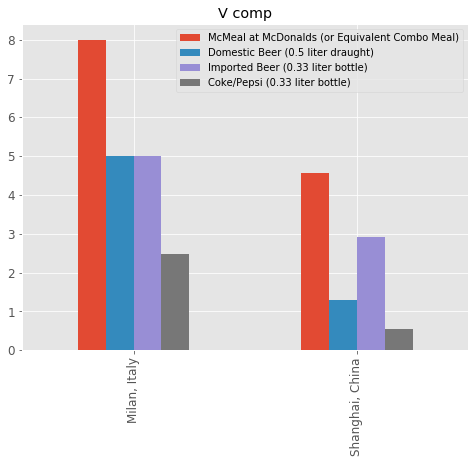

In [343]:
data = {
    food_category[2]: {
        city[0]: df.loc[food_category[2], city[0]],
        city[3]: df.loc[food_category[2], city[3]]
    },
    food_category[3]: {
        city[0]: df.loc[food_category[3], city[0]],
        city[3]: df.loc[food_category[3], city[3]]
    },
        food_category[4]: {
        city[0]: df.loc[food_category[4], city[0]],
        city[3]: df.loc[food_category[4], city[3]]
    },
    food_category[5]: {
        city[0]: df.loc[food_category[5], city[0]],
        city[3]: df.loc[food_category[5], city[3]]
    }
}

df_tem = pd.DataFrame(data)
_ = df_tem[[food_category[2], food_category[3],
      food_category[4], food_category[5]]].plot(kind='bar',
                              title="V comp",
                              figsize=(8, 6),
                              legend=True,
                              fontsize=12)